In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)

num_samples = 1000

years = np.random.choice(np.arange(2010, 2021), size=num_samples, p=np.linspace(1, 11, 11) / 66).astype(int)

order_value = np.random.uniform(50, 500, num_samples)
discount_percentage = np.random.uniform(0, 0.3, num_samples)
customer_rating = np.random.randint(1, 6, num_samples)
customer_acquisition_cost = np.random.uniform(1, 5, num_samples)
gross_profit_margin = np.random.uniform(0.2, 0.5, num_samples)
ppc_marketing_metrics = np.random.uniform(1, 10, num_samples)

discounts = order_value * discount_percentage

data = pd.DataFrame({
    'Year': years,
    'Order Value': order_value,
    'Discounts': discounts,
    'Customer Rating': customer_rating,
    'Customer Acquisition Cost': customer_acquisition_cost,
    'Gross Profit Margin': gross_profit_margin,
    'PPC & Marketing Metrics': ppc_marketing_metrics
})

return_rate = np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1])
data['Return Rate'] = return_rate
data['Total Sales'] = data['Order Value'] - data['Discounts']
data['Customer Acquisition Cost'] = data['PPC & Marketing Metrics'] / data['Customer Acquisition Cost']
data['Marketing Costs'] = data['PPC & Marketing Metrics']

data.sort_values(by='Year', inplace=True)

data.to_csv('user_input_data.csv', index=False)

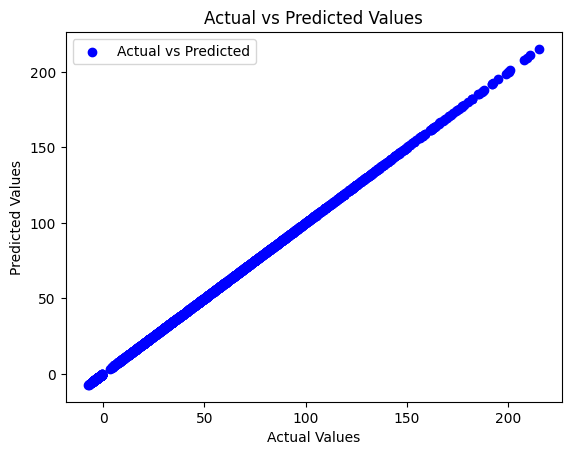

R-squared: 1.0
Mean Absolute Error: 5.037548156394678e-14
Root Mean Squared Error: 8.076755376677248e-14


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('ecommerce_data.csv')

features = data[['Return Rate', 'Total Sales', 'Discounts', 
                 'Customer Acquisition Cost', 'Marketing Costs', 'Gross Profit Margin']]
target = data['Net Revenue']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = make_pipeline(
    PolynomialFeatures(degree=3, interaction_only=True, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

In [10]:
import pickle
import pandas as pd

with open('Advlinear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('Advlinear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)